In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline


In [3]:
train = pd.read_csv('project/train_users_2.csv')
test = pd.read_csv('project/test_users.csv')
#gender = pd.read_csv('project/age_gender_bkts.csv')
sessions = pd.read_csv('project/sessions.csv')
countries= pd.read_csv('project/countries.csv')
train = train.dropna()
test = test.dropna()

In [72]:
from datetime import datetime 
current_year = datetime.now().year
val = train.age.values
train['age'] = np.where(np.logical_and(val>1920, val<2008), current_year-val, val)
train['age'] = np.where(np.logical_or(val<10, val>100), np.nan, val)

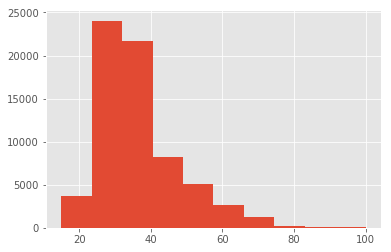

In [73]:
train.age.hist(bins=10)

In [74]:
gender_val = train.gender.values
train['gender'] = np.where(gender_val=='-unknown-', 'OTHER', gender_val)

In [75]:
# plt.hist(list(train['gender']))

In [76]:
train['gender'].describe()

count      68171
unique         3
top       FEMALE
freq       29863
Name: gender, dtype: object

In [77]:
train = pd.read_csv('project/train_users_2.csv')
train.timestamp_first_active[0]

20090319043255

In [78]:
col = train.timestamp_first_active
year= [int(str(col[i])[:4]) for i in range(len(col))]
month= [int(str(col[i])[4:6]) for i in range(len(col))]
date = [int(str(col[i])[4:8]) for i in range(len(col))]
hour = [int(str(col[i])[8:10]) for i in range(len(col))]
minn = [int(str(col[i])[10:12]) for i in range(len(col))]
secs = [int(str(col[i])[12:]) for i in range(len(col))]

In [79]:
train.drop('timestamp_first_active', axis=1, inplace=True)

In [80]:
browser_type = train.first_browser
train.first_browser = np.where(browser_type=='-unknown-', 'OTHER', browser_type)

In [81]:
from collections import Counter
dict1 = Counter(train.signup_method)

Counter({'basic': 152897, 'facebook': 60008, 'google': 546})


([<matplotlib.axis.XTick at 0x2c227595470>,
 <a list of 3 Text xticklabel objects>)

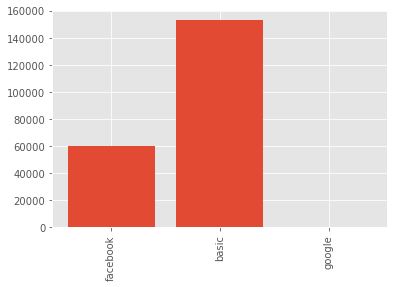

In [82]:
y=list(dict1.values())
x=list(dict1.keys())
print(dict1)
plt.bar(range(len(x)), y, align='center')
plt.xticks(range(len(x)), x, rotation=90)

In [84]:
train.drop('date_first_booking', axis=1, inplace=True)

In [85]:
train.first_affiliate_tracked.value_counts()
train.first_affiliate_tracked.fillna('untracked',inplace=True)
train.first_affiliate_tracked.value_counts()

untracked        115297
linked            46287
omg               43982
tracked-other      6156
product            1556
marketing           139
local ops            34
Name: first_affiliate_tracked, dtype: int64

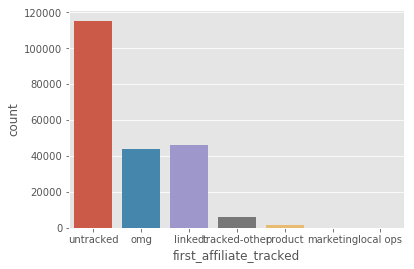

In [92]:
import seaborn as sns
sns.countplot(train.first_affiliate_tracked)
train['age'].fillna(-1, inplace=True)

In [93]:
train.isnull().sum()

id                         0
date_account_created       0
gender                     0
age                        0
signup_method              0
signup_flow                0
language                   0
affiliate_channel          0
affiliate_provider         0
first_affiliate_tracked    0
signup_app                 0
first_device_type          0
first_browser              0
country_destination        0
dtype: int64

In [94]:
sessions["action_type"].value_counts()

view                3560902
data                2103770
click               1996183
-unknown-           1031170
submit               623357
message_post          87103
partner_callback      19132
booking_request       18773
modify                 1139
booking_response          4
Name: action_type, dtype: int64

In [95]:
train.country_destination.value_counts(dropna=False)

NDF      124543
US        62376
other     10094
FR         5023
IT         2835
GB         2324
ES         2249
CA         1428
DE         1061
NL          762
AU          539
PT          217
Name: country_destination, dtype: int64

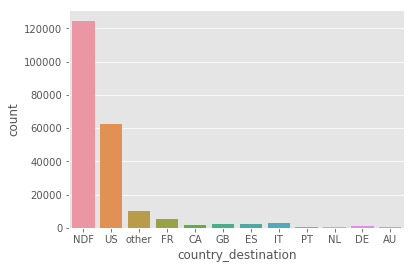

In [96]:
sns.countplot(train.country_destination)

In [4]:
sessions.isnull().sum()

user_id            34496
action             79626
action_type      1126204
action_detail    1126204
device_type            0
secs_elapsed      136031
dtype: int64

In [9]:
nan_vals = sessions.loc[sessions['action'].isnull(), :]
nan_vals["action_type"].value_counts()
nan_vals["action_detail"].value_counts()

message_post    79626
Name: action_detail, dtype: int64

In [12]:
sessions.action_type.value_counts()
sessions.action_type.fillna('-unknown-',inplace=True)
sessions.action_type.value_counts()

view                3560902
-unknown-           2157374
data                2103770
click               1996183
submit               623357
message_post          87103
partner_callback      19132
booking_request       18773
modify                 1139
booking_response          4
Name: action_type, dtype: int64

In [14]:
sessions.action_detail.value_counts()
sessions.action_detail.fillna('-unknown-',inplace=True)
sessions.action_detail.value_counts().head()

-unknown-                  2157345
view_search_results        1776885
p3                         1376550
wishlist_content_update     706824
user_profile                656839
Name: action_detail, dtype: int64

In [24]:
sessions.isnull().sum()

user_id          0
action           0
action_type      0
action_detail    0
device_type      0
secs_elapsed     0
dtype: int64

In [18]:
sessions.secs_elapsed.fillna(0,inplace=True)
sessions['action'].fillna('unknown', inplace=True)

In [23]:
sessions.dropna(subset=['user_id'],inplace=True)

In [25]:
sessions.isnull().sum()

user_id          0
action           0
action_type      0
action_detail    0
device_type      0
secs_elapsed     0
dtype: int64

In [26]:
##Data Cleaning of session file and train file done.
##todo: Merging of session file
##tdo EDA